# Sentiment Analysis of Sydney TripAdvisor Reviews

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [84]:
data1 = pd.read_csv("TripAdviser+Reviews.csv")
data2 = pd.read_csv("TripAdviser+Reviews2.csv")
data3 = pd.read_csv("TripAdviser+Reviews3.csv")
data4 = pd.read_csv("TripAdviser+Reviews4.csv")

In [102]:
data = pd.concat([data1,data2,data3,data4],join='outer')

In [100]:
data.head()

,Organization,Address,Reviewer,Review Title,Review,Review Count,Helpful Count,Restaurant Count,Location,Rating Date,Rating
0,Twenty 8 Acres,Shop 1 74-80 Ivy Street | Chippendale-Darlingt...,Narziss,Lives up to its reputation,We visited this caf / restaurant because of it...,374,98,134,New Zealand,4 days ago,4
1,Twenty 8 Acres,Shop 1 74-80 Ivy Street | Chippendale-Darlingt...,A_brown45,Lives up to its reputation,We visited this caf / restaurant because of it...,7,1,5,Sydney New South Wales,4 days ago,4
2,Twenty 8 Acres,Shop 1 74-80 Ivy Street | Chippendale-Darlingt...,Me B,Wow!! Amazing Experience !!,I chose this place because of TripAdvisor high...,2,0,0,Sydney New South Wales,4 days ago,5
3,Twenty 8 Acres,Shop 1 74-80 Ivy Street | Chippendale-Darlingt...,funkypelican,Friendly staff - fantastic food,The staff - including the chefs - are incredib...,10,9,0,Sydney New South Wales,1 week ago,5
4,Twenty 8 Acres,Shop 1 74-80 Ivy Street | Chippendale-Darlingt...,shazcmac,This is a great value restaurant with people w...,The food and service is excellent.It is small ...,2,0,0,Sydney New South Wales,1 week ago,5


In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130350 entries, 0 to 489
Data columns (total 11 columns):
Organization        118132 non-null object
Address             130347 non-null object
Reviewer            130341 non-null object
Review Title        130339 non-null object
Review              130350 non-null object
Review Count        130350 non-null object
Helpful Count       130350 non-null object
Restaurant Count    130350 non-null object
Location            127691 non-null object
Rating Date         130311 non-null object
Rating              118095 non-null float64
dtypes: float64(1), object(10)
memory usage: 11.9+ MB


In [129]:
data['Restaurant Count'].fillna(0,inplace=True)
data['Review'].fillna(0,inplace=True)
data['Review Count'].fillna(0,inplace=True)
data['Helpful Count'].fillna(0,inplace=True)

In [130]:
data.isnull().sum()

Organization        12218
Address                 3
Reviewer                9
Review Title           11
Review                  0
Review Count            0
Helpful Count           0
Restaurant Count        0
Location             2659
Rating Date            39
Rating              12255
dtype: int64

In [139]:
for n in data['Rating Date'].unique():
    print n

4 days ago
1 week ago
2 weeks ago
3 weeks ago
4 weeks ago
5 weeks ago
December 20  2015
December 15  2015
December 14  2015
November 27  2015
November 24  2015
November 21  2015
November 13  2015
November 12  2015
November 11  2015
November 6  2015
November 4  2015
October 30  2015
October 26  2015
October 25  2015
October 24  2015
October 23  2015
October 18  2015
October 14  2015
October 4  2015
September 30  2015
September 29  2015
September 26  2015
September 12  2015
September 6  2015
August 31  2015
August 22  2015
August 20  2015
August 15  2015
August 14  2015
August 7  2015
August 4  2015
July 31  2015
July 30  2015
July 29  2015
July 28  2015
July 27  2015
July 19  2015
July 17  2015
July 10  2015
July 9  2015
July 7  2015
June 29  2015
June 23  2015
June 22  2015
June 16  2015
June 13  2015
June 12  2015
June 6  2015
June 3  2015
May 31  2015
May 26  2015
May 18  2015
May 16  2015
May 14  2015
May 10  2015
April 29  2015
April 26  2015
April 25  2015
April 18  2015
April 19 

In [141]:
data.groupby('Rating').size().order(ascending=False).head()

Rating
5    48940
4    43126
3    14088
2     6068
1     5873
dtype: int64

In [82]:
x = data1.groupby("Organization").size() > 10
x = pd.DataFrame(x).reset_index()
x.rename(columns={0:'Boolean'}, inplace=True)
newdata = data1.join(x)

ValueError: columns overlap but no suffix specified: Index([u'Organization'], dtype='object')

In [58]:
pd.DataFrame?

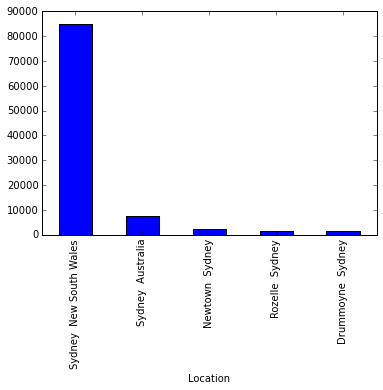

In [137]:
data.groupby('Location').size().order(ascending=False).head(5).plot(kind='bar')